In [1]:
#Step 1:import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
#Step 2:read the datset
df=pd.read_csv('https://raw.githubusercontent.com/goradbj/MachineLearning/main/Regression/Road-Accidents-2018-Annexure-1.csv')
df.head()

,Years,Total Number of Road Accidents (in numbers),Total Number of Persons Killed (in numbers),Total Number of Persons Injured (in numbers),Population of India (in thousands),Total Number of Registered Motor Vehicles (in thousands),Road Length (in kms),Number of Accidents per Lakh Population,Number of Accidents per Ten Thousand Vehicles,Number of Accidents Per Ten Thousand Kms of Roads,Number of Persons Killed Per Lakh Population,Number of Persons Killed Per Ten Thousand Vehicles,Number of Persons Killed per Ten Thousand Kms of Roads,Number of Persons Injured per Lakh Population,Number of Persons Injured Per Ten Thousand Vehicles,Number of Persons Injured Per Ten Thousand Kms of Roads
0,1970,114100.0,14500.0,70100.0,539000.0,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7
1,1980,153200.0,24000.0,109100.0,673000.0,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3
2,1990,282600.0,54100.0,244100.0,835000.0,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4
3,1994,325864.0,64463.0,311500.0,904000.0,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5
4,1995,351999.0,70781.0,323200.0,924359.0,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4


In [4]:
#Exploratory data analysis and data preprocession
df.shape

(29, 16)

In [5]:
df.columns

Index(['Years', 'Total Number of Road Accidents (in numbers)',
       'Total Number of Persons Killed (in numbers)',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands)',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents Per Ten Thousand Kms of Roads',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles',
       'Number of Persons Killed per Ten Thousand Kms of Roads',
       'Number of Persons Injured per Lakh Population',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads'],
      dtype='object')

In [8]:
#select only relevant columns for building model
df=df[['Years','Total Number of Persons Killed (in numbers)']]

In [9]:
df

,Years,Total Number of Persons Killed (in numbers)
0,1970,14500.00
1,1980,24000.00
2,1990,54100.00
3,1994,64463.00
4,1995,70781.00
5,1996,74665.00
6,1997,76977.00
7,1998,79919.00
8,1999,81966.00
9,2000,78911.00


In [10]:
#drop record index(28) as it is not in proper format
df=df.drop(df.index[28])

In [11]:
df.tail()

,Years,Total Number of Persons Killed (in numbers)
23,2014,139671.0
24,2015,146133.0
25,2016,150785.0
26,2017,147913.0
27,2018,151417.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Years                                        28 non-null     object 
 1   Total Number of Persons Killed (in numbers)  28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 672.0+ bytes


In [13]:
#check for missing values
df.isnull().sum()

Years                                          0
Total Number of Persons Killed (in numbers)    0
dtype: int64

In [14]:
#data is already numerical so there is no  need of encoding

Text(0.5, 1.0, 'car road accidents in india-yearwise')

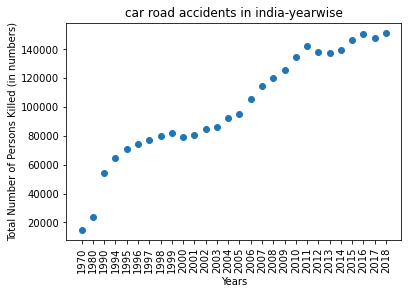

In [17]:
#data visualization
plt.scatter(df['Years'],df['Total Number of Persons Killed (in numbers)'])
plt.xticks(rotation='vertical')
plt.xlabel(('Years'))
plt.ylabel(('Total Number of Persons Killed (in numbers)'))
plt.title(('car road accidents in india-yearwise'))

# Divide the dataset into train and test

In [28]:
x=df[['Years']]

In [29]:
y=df[['Total Number of Persons Killed (in numbers)']]

In [31]:
x.shape

(28, 1)

In [32]:
y.shape

(28, 1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [35]:
print(df.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 2)
(22, 1)
(6, 1)
(22, 1)
(6, 1)


In [36]:
#to build model

In [37]:
prediction_model=linear_model.LinearRegression()

In [38]:
prediction_model.fit(x_train,y_train)

LinearRegression()

In [39]:
# m1 and m2 is
prediction_model.coef_

array([[3738.36304197]])

In [40]:
#c is 
prediction_model.intercept_

array([-7389494.91941232])

In [41]:
#Do the prediction
prediction_model.predict([[2015]])

array([[143306.61016384]])

In [42]:
prediction_model.predict([[2016]])

array([[147044.97320581]])

In [43]:
#Evaluate the model

In [45]:
y_pred=prediction_model.predict(x_test)
y_pred

array([[117138.06887003],
       [ 83492.80149227],
       [ 49847.53411451],
       [-24919.72672496],
       [102184.61670213],
       [ 64800.9862824 ]])

In [46]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

9637.588036204223
278895457.1505415
16700.1633869415
0.7423640016287478


In [54]:
plt.scatter(df['Years'],df['Total Number of Persons Killed (in numbers)'],color='red')
plt.scatter(df['Years'],prediction_model.predict(df[['Total Number of Persons Killed (in number)']])
plt.xlabel('Years')
plt.ylabel('Total Number of Persons Killed (in numbers)')
plt.title('no.of people died-Yearwise')
plt.show()

SyntaxError: invalid syntax (<ipython-input-54-b669948004d0>, line 3)